WeatherPy

Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sydney
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | prado
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | wodonga
Processing Record 10 of Set 1 | fort bragg
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | massakory
Processing Record 14 of Set 1 | monrovia
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | kapuskasi

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sydney,-33.8679,151.2073,20.17,92,75,9.77,AU,1705259076
1,klaksvik,62.2266,-6.5890,-2.49,82,100,17.19,FO,1705259893
2,adamstown,-25.0660,-130.1015,23.94,76,1,6.66,PN,1705259893
3,prado,-17.3411,-39.2208,28.35,71,7,6.20,BR,1705259893
4,bredasdorp,-34.5322,20.0403,19.96,71,66,2.19,ZA,1705259863


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sydney,-33.8679,151.2073,20.17,92,75,9.77,AU,1705259076
1,klaksvik,62.2266,-6.5890,-2.49,82,100,17.19,FO,1705259893
2,adamstown,-25.0660,-130.1015,23.94,76,1,6.66,PN,1705259893
3,prado,-17.3411,-39.2208,28.35,71,7,6.20,BR,1705259893
4,bredasdorp,-34.5322,20.0403,19.96,71,66,2.19,ZA,1705259863


Create the Scatter Plots Requested

Latitude Vs. Temperature

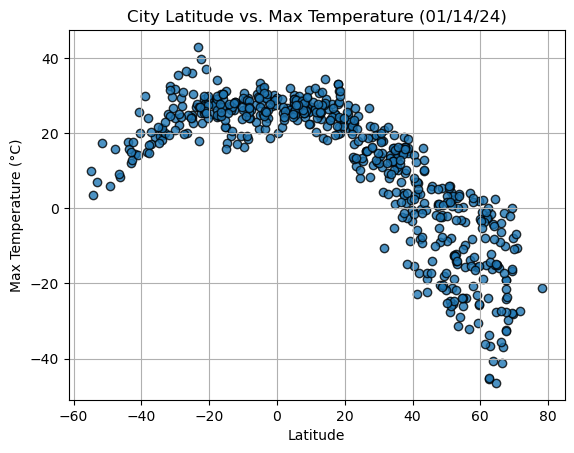

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

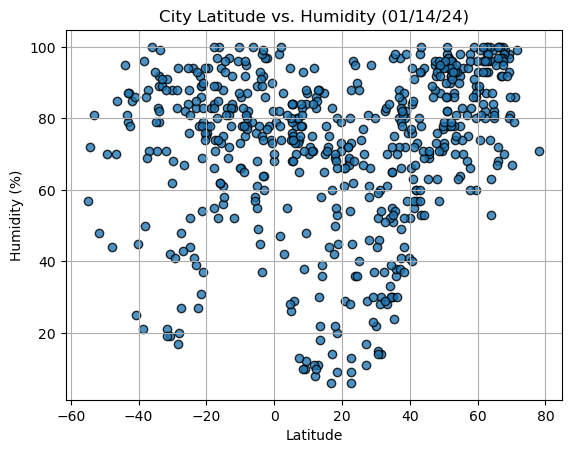

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

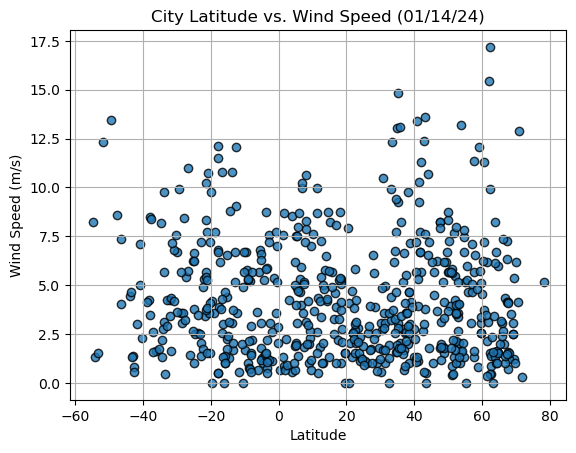

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [11]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {rvalue**2}")

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,klaksvik,62.2266,-6.5890,-2.49,82,100,17.19,FO,1705259893
5,st. john's,47.5649,-52.7093,0.99,95,100,8.23,CA,1705259869
9,fort bragg,35.1390,-79.0060,15.51,30,0,9.26,US,1705259883
10,bandarbeyla,9.4942,50.8122,25.75,84,11,6.98,SO,1705259894
11,vorgashor,67.5833,63.9500,-32.37,96,96,1.60,RU,1705259880


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sydney,-33.8679,151.2073,20.17,92,75,9.77,AU,1705259076
2,adamstown,-25.0660,-130.1015,23.94,76,1,6.66,PN,1705259893
3,prado,-17.3411,-39.2208,28.35,71,7,6.20,BR,1705259893
4,bredasdorp,-34.5322,20.0403,19.96,71,66,2.19,ZA,1705259863
6,sao joao da barra,-21.6403,-41.0511,29.05,86,100,3.40,BR,1705259872


Temperature vs. Latitude Linear Regression Plot

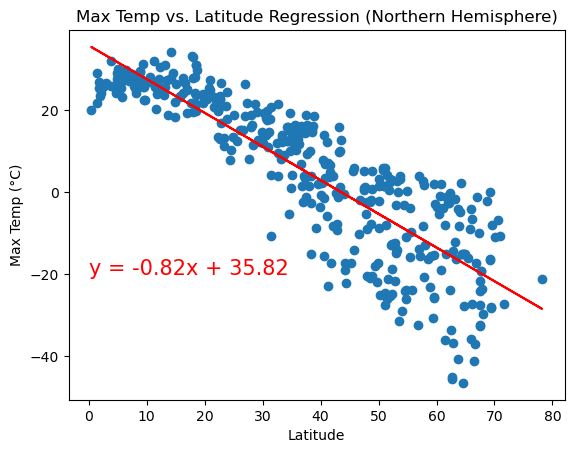

The r-value is: 0.7542888750491346


In [14]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       'Max Temp vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Max Temp (°C)', (0, -20))

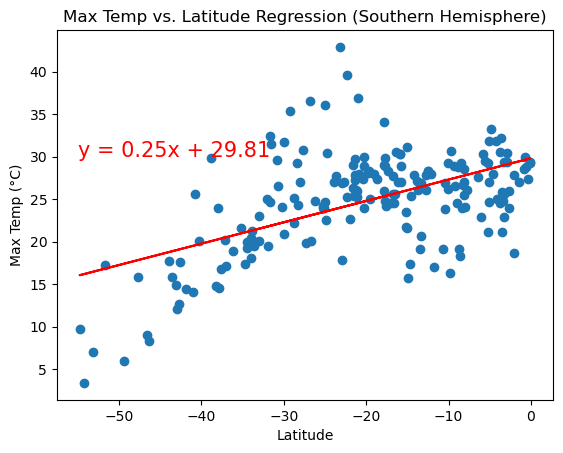

The r-value is: 0.30127674429863505


In [15]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       'Max Temp vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Max Temp (°C)', (-55, 30))

The observed temperature patterns align with established climate expectations. In the Northern Hemisphere, as one moves away from the equator towards the poles, there is a noticeable decrease in temperature. This negative correlation is substantiated by a high r-value, emphasizing the influential role of latitude in determining temperatures in this hemisphere.

Conversely, in the Southern Hemisphere, where latitudes closer to the equator are examined, there exists a positive correlation, indicating that temperatures tend to rise as one approaches the equator. However, this correlation is not as robust as in the Northern Hemisphere. This difference may be attributed to the Southern Hemisphere containing a larger proportion of oceanic areas, which can moderate temperature variations.

In summary, the analysis underscores the substantial influence of latitude on temperature, showcasing an inverse relationship in the Northern Hemisphere compared to the Southern Hemisphere. This aligns with general expectations, as temperatures typically exhibit higher values near the equator and lower values towards the poles.


Humidity vs. Latitude Linear Regression Plot

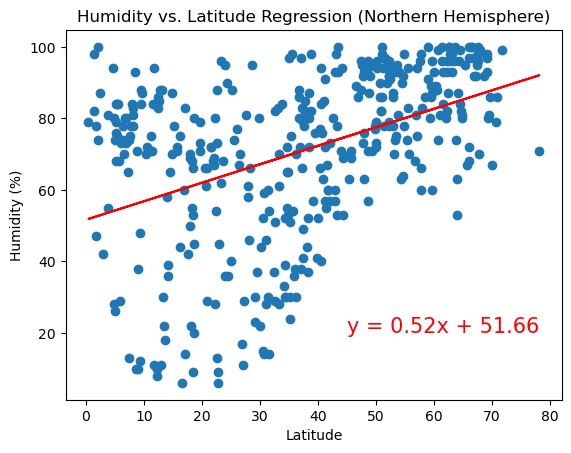

The r-value is: 0.1893346313460023


In [16]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       'Humidity vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Humidity (%)', (45, 20))

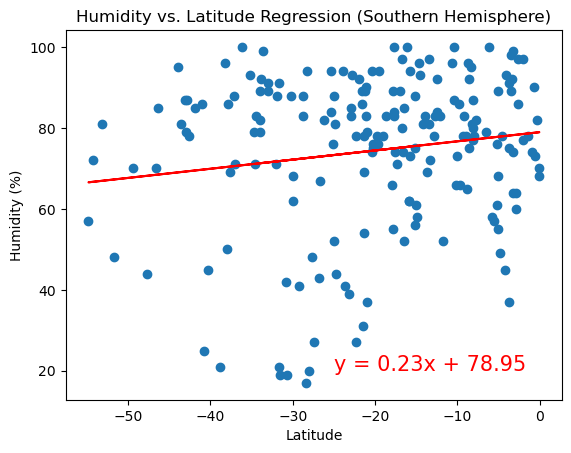

The r-value is: 0.023728309187411884


In [17]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       'Humidity vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Humidity (%)', (-25, 20))

In the Southern Hemisphere, the linear regression analysis for humidity versus latitude indicates a very weak positive correlation. This suggests that there is minimal association between latitude and humidity in the Southern Hemisphere. The scatter plot further supports this, as data points are dispersed without a clear trend, emphasizing the limited impact of latitude on humidity in this region.

On the other hand, the Northern Hemisphere's linear regression analysis for humidity versus latitude yields a slightly stronger positive. While still relatively weak, this correlation suggests a modest association between latitude and humidity in the Northern Hemisphere. The scatter plot shows a broader distribution of data points, indicating a more varied relationship compared to the Southern Hemisphere.

In summary, the analyses suggest that latitude has a limited influence on humidity in both hemispheres, with the Northern Hemisphere showing a slightly more discernible correlation. Other factors may contribute more significantly to humidity variations in these regions.

Cloudiness vs. Latitude Linear Regression Plot

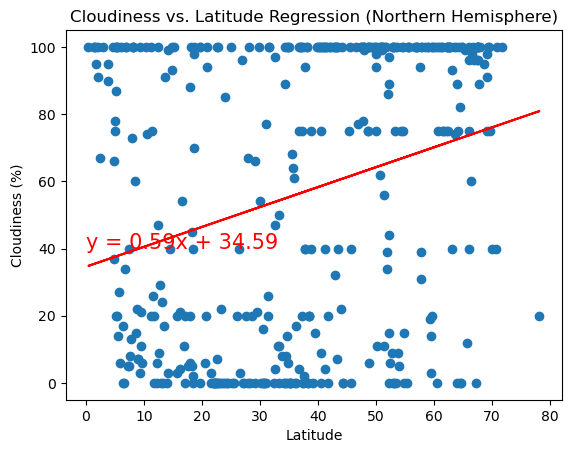

The r-value is: 0.07741279674182529


In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       'Cloudiness vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Cloudiness (%)', (0, 40))

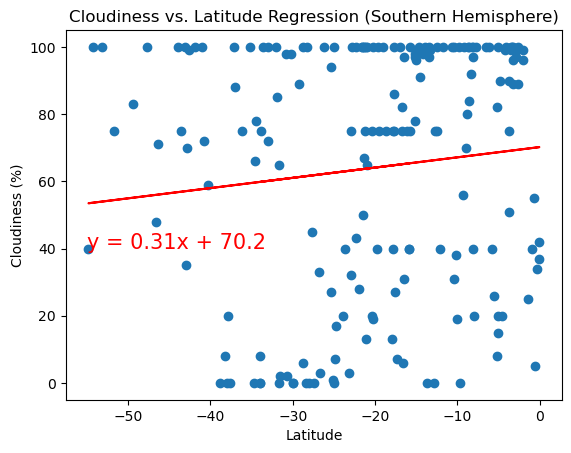

The r-value is: 0.0117307898535851


In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       'Cloudiness vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Cloudiness (%)', (-55, 40))

In the Northern Hemisphere, the linear regression analysis for cloudiness versus latitude indicates a very weak positive. This implies a slight tendency for cloudiness to increase as one moves away from the equator in the Northern Hemisphere. The scatter plot shows scattered data points, emphasizing the limited association between latitude and cloudiness.

Conversely, in the Southern Hemisphere, the linear regression analysis for cloudiness versus latitude yields an even weaker positive correlation. This suggests a minimal association between latitude and cloudiness in the Southern Hemisphere. The scatter plot displays widely dispersed data points, indicating the lack of a clear trend and reinforcing the weak correlation observed.

In summary, both hemispheres exhibit weak positive correlations between latitude and cloudiness, suggesting that latitude may have a subtle influence on cloud cover, but other factors likely play a more significant role in determining cloudiness patterns.

Wind Speed vs. Latitude Linear Regression Plot

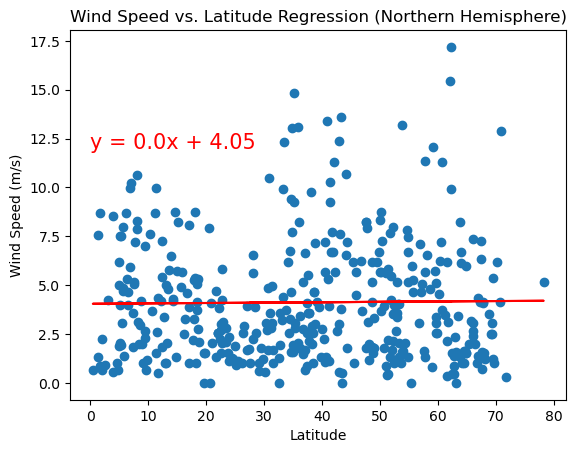

The r-value is: 0.0001645603992740859


In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       'Wind Speed vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Wind Speed (m/s)', (0, 12))

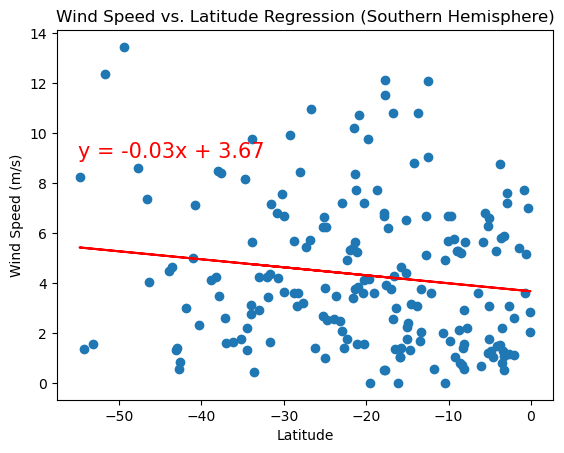

The r-value is: 0.020253018656847154


In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       'Wind Speed vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Wind Speed (m/s)', (-55, 9))

In the Southern Hemisphere, the linear regression analysis for wind speed versus latitude shows a very weak positive correlation. This suggests a minimal association between latitude and wind speed in the Southern Hemisphere. The scatter plot displays widely dispersed data points, indicating the lack of a clear trend and reinforcing the weak correlation observed.

Similarly, in the Northern Hemisphere, the linear regression analysis for wind speed versus latitude reveals an extremely weak positive correlation. This indicates a negligible association between latitude and wind speed in the Northern Hemisphere. The scatter plot illustrates scattered data points, emphasizing the lack of a discernible pattern and supporting the weak correlation observed.

In summary, both hemispheres exhibit weak positive correlations between latitude and wind speed, suggesting that latitude may have a subtle influence on wind speed, but other factors likely play a more significant role in determining wind speed patterns.